In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import warnings
# Suppress all warnings (not recommended unless you are sure)
warnings.filterwarnings("ignore")
# Or, suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
# Reset warnings to default behavior
warnings.resetwarnings()


In [3]:
#boston = datasets.load_boston()
boston_df=pd.read_csv("HousingData.csv")

In [4]:
#pip install scikit-learn==1.1.3

In [5]:
#boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#boston_df.head()
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# Handling missing values for each column

# For simplicity, we will fill numerical missing values with the median of their respective columns
# This is a common practice when the amount of missing data is not significant

# Check for missing values
print("Missing values before handling:")
print(boston_df.isnull().sum())

Missing values before handling:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64


In [9]:
boston_df = boston_df.fillna(boston_df.mean())

# Check again for missing values after handling
print("\nMissing values after handling:")
print(boston_df.isnull().sum())


Missing values after handling:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64


In [10]:
# Calculate the correlation matrix

# Use the dataframe with filled missing values
correlation_matrix = boston_df.corr()

# Display the correlation matrix
print(correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.182930  0.391161 -0.052223  0.410377 -0.215434  0.344934   
ZN      -0.182930  1.000000 -0.513336 -0.036147 -0.502287  0.316550 -0.541274   
INDUS    0.391161 -0.513336  1.000000  0.058035  0.740965 -0.381457  0.614592   
CHAS    -0.052223 -0.036147  0.058035  1.000000  0.073286  0.102284  0.075206   
NOX      0.410377 -0.502287  0.740965  0.073286  1.000000 -0.302188  0.711461   
RM      -0.215434  0.316550 -0.381457  0.102284 -0.302188  1.000000 -0.241351   
AGE      0.344934 -0.541274  0.614592  0.075206  0.711461 -0.241351  1.000000   
DIS     -0.366523  0.638388 -0.699639 -0.091680 -0.769230  0.205246 -0.724353   
RAD      0.608886 -0.306316  0.593176  0.001425  0.611441 -0.209847  0.449989   
TAX      0.566528 -0.308334  0.716062 -0.031483  0.668023 -0.292048  0.500589   
PTRATIO  0.273384 -0.403085  0.384806 -0.109310  0.188933 -0.355501  0.262723   
B       -0.370163  0.167431 

<Axes: >

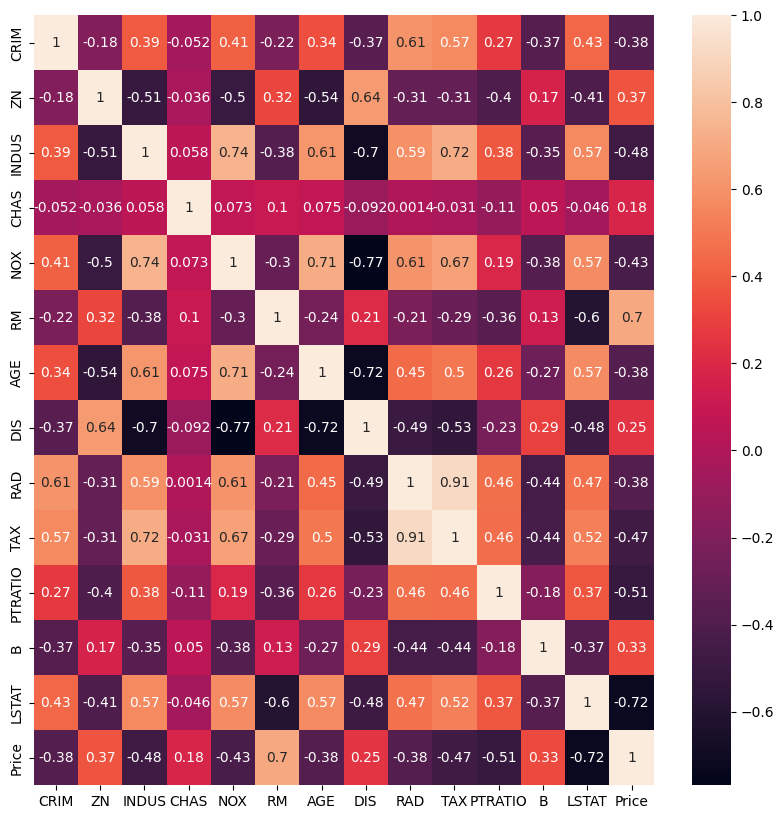

In [11]:

correlation=boston_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,annot=True)


In [12]:
#Showing Positive and Negative Correlation
positive_correlations = boston_df.corr().unstack().sort_values(ascending=False)
positive_correlations = positive_correlations[positive_correlations > 0]

negative_correlations = boston_df.corr().unstack().sort_values()
negative_correlations = negative_correlations[negative_correlations < 0]

print('Positive Correlations:\n', positive_correlations.head(20))
print('\nNegative Correlations:\n', negative_correlations.head(20))

Positive Correlations:
 CRIM     CRIM       1.000000
ZN       ZN         1.000000
LSTAT    LSTAT      1.000000
B        B          1.000000
PTRATIO  PTRATIO    1.000000
TAX      TAX        1.000000
RAD      RAD        1.000000
DIS      DIS        1.000000
AGE      AGE        1.000000
RM       RM         1.000000
NOX      NOX        1.000000
CHAS     CHAS       1.000000
INDUS    INDUS      1.000000
Price    Price      1.000000
TAX      RAD        0.910228
RAD      TAX        0.910228
INDUS    NOX        0.740965
NOX      INDUS      0.740965
TAX      INDUS      0.716062
INDUS    TAX        0.716062
dtype: float64

Negative Correlations:
 NOX      DIS       -0.769230
DIS      NOX       -0.769230
AGE      DIS       -0.724353
DIS      AGE       -0.724353
LSTAT    Price     -0.721975
Price    LSTAT     -0.721975
INDUS    DIS       -0.699639
DIS      INDUS     -0.699639
LSTAT    RM        -0.602962
RM       LSTAT     -0.602962
AGE      ZN        -0.541274
ZN       AGE       -0.541274
DIS     

c:\Users\Kaptaan Saab\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


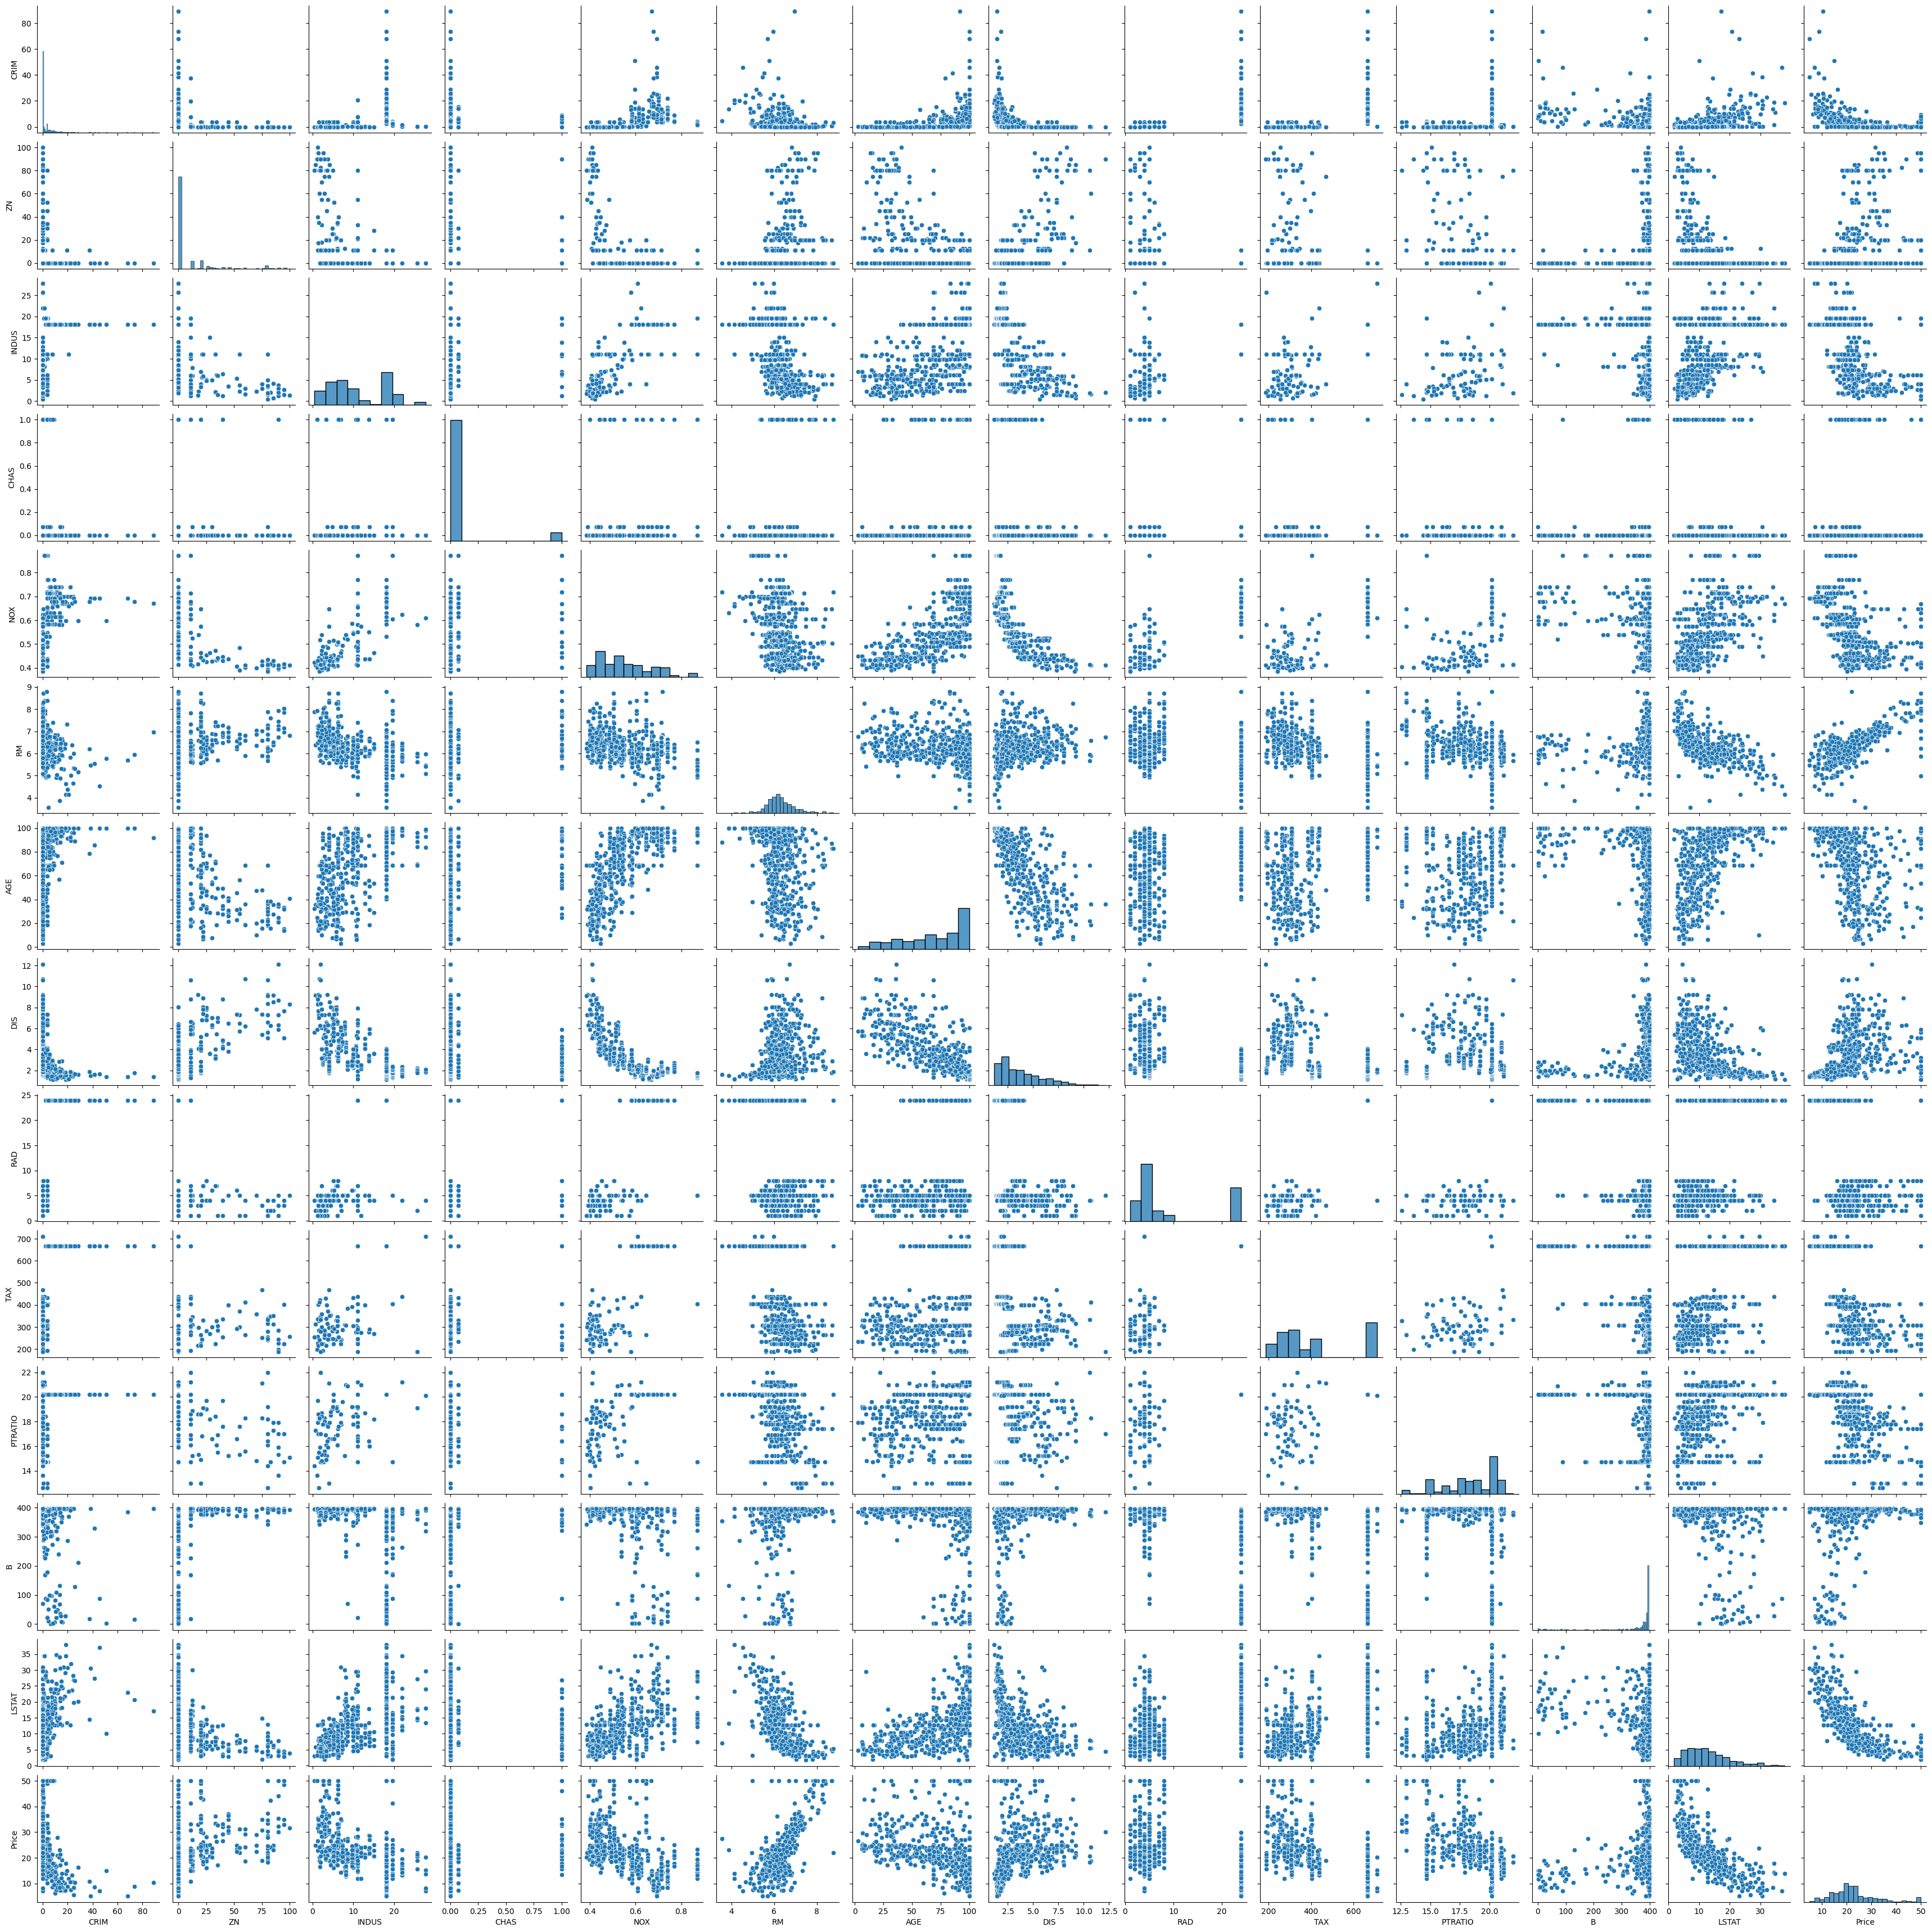

In [13]:
import seaborn as sns
sns.pairplot(boston_df)

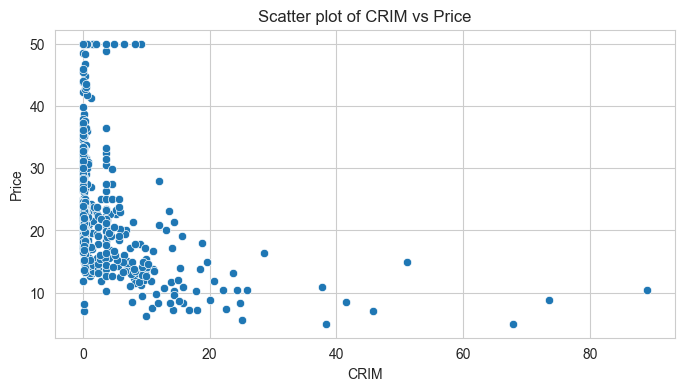

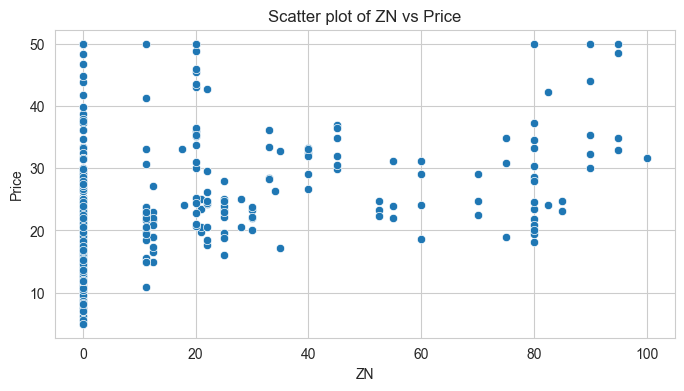

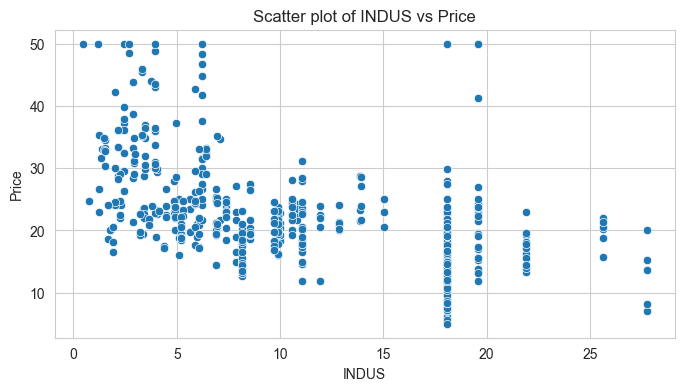

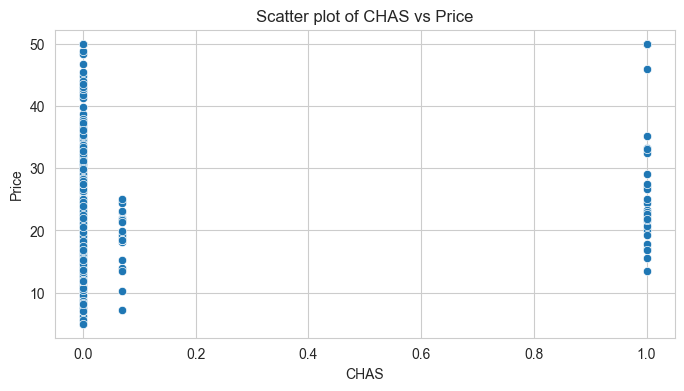

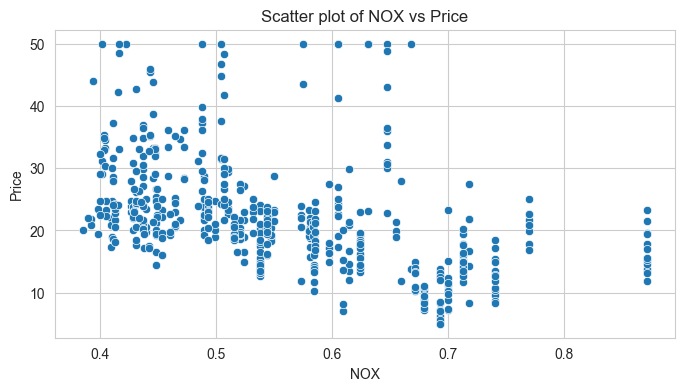

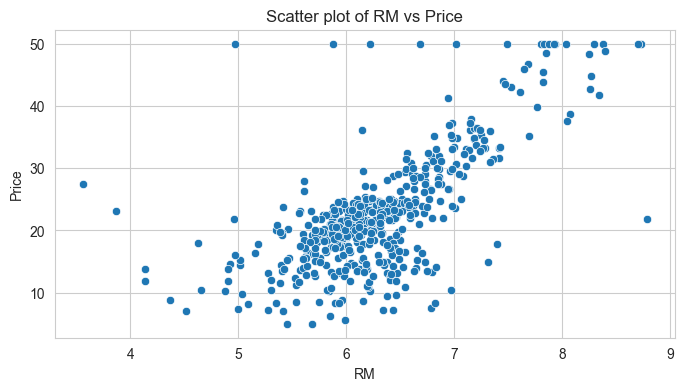

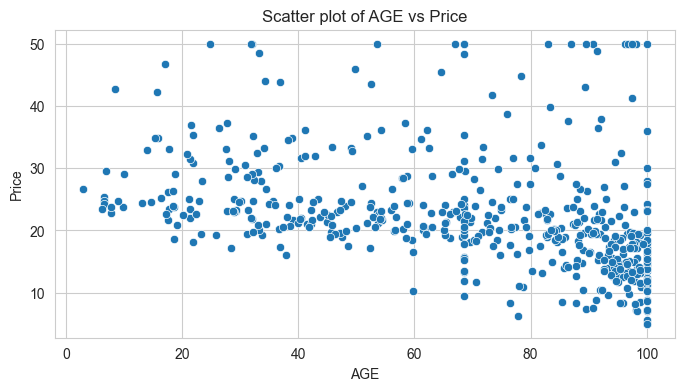

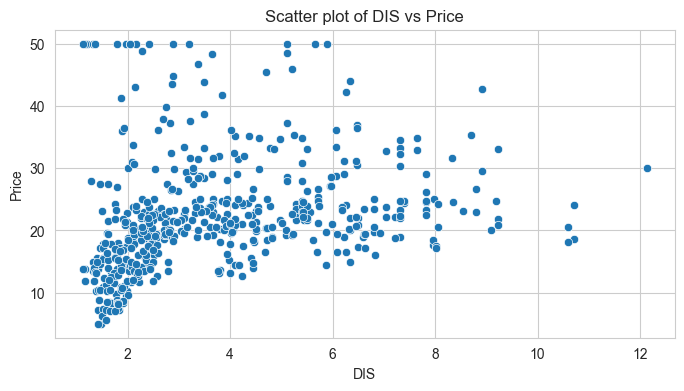

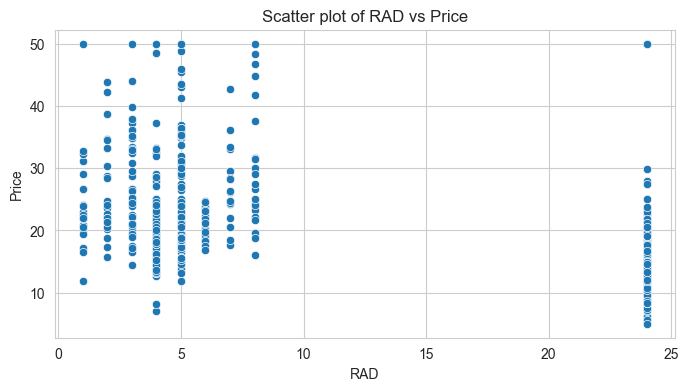

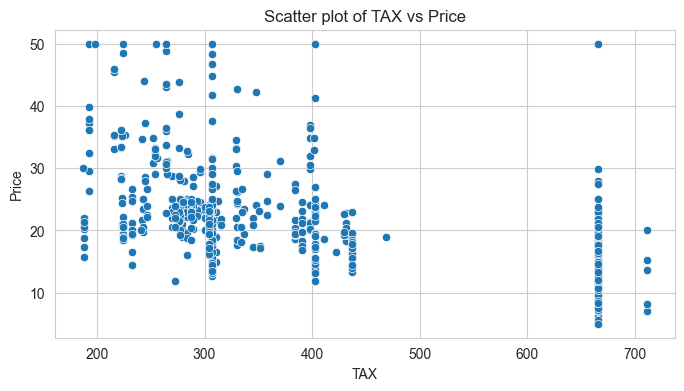

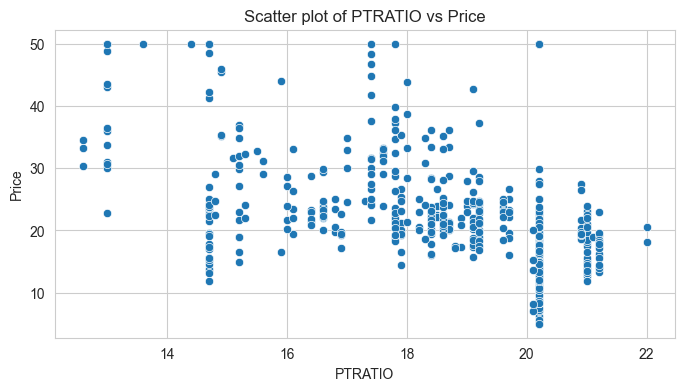

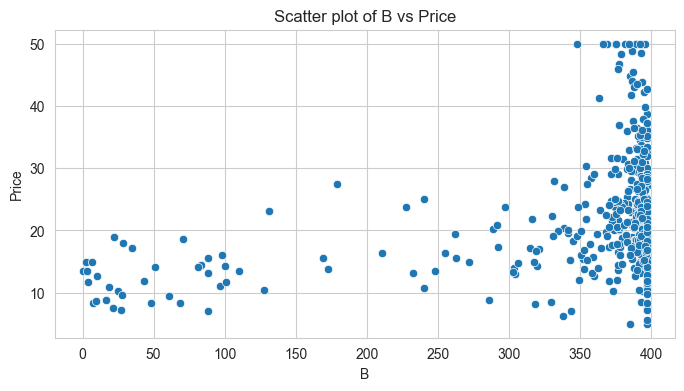

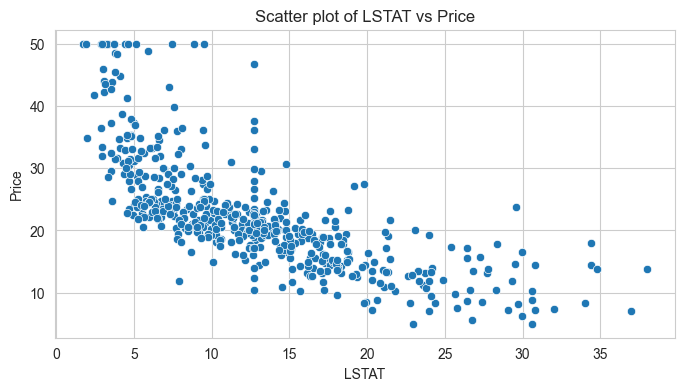

In [14]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# We will plot scatter plots for all columns with the target column 'MEDV' which represents Price
for column in boston_df.columns:
    if column != 'Price':
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=boston_df, x=column, y='Price')
        plt.title(f'Scatter plot of {column} vs Price')
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.show()

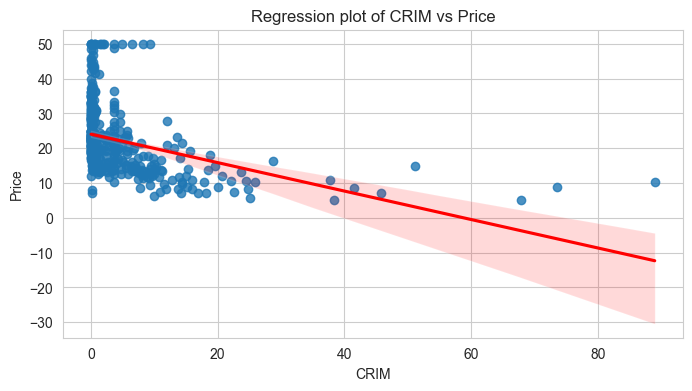

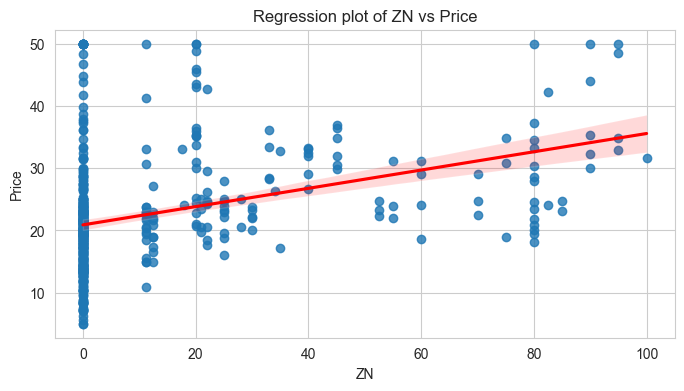

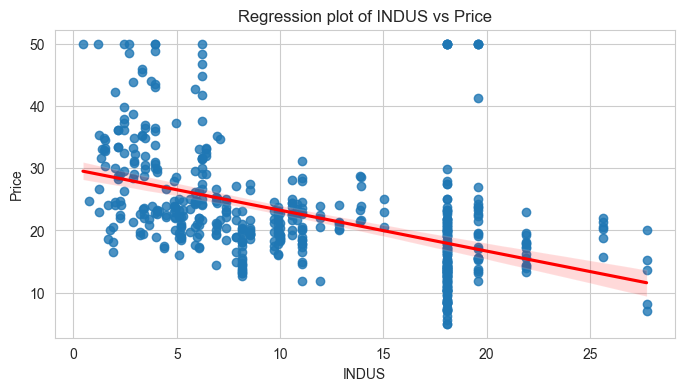

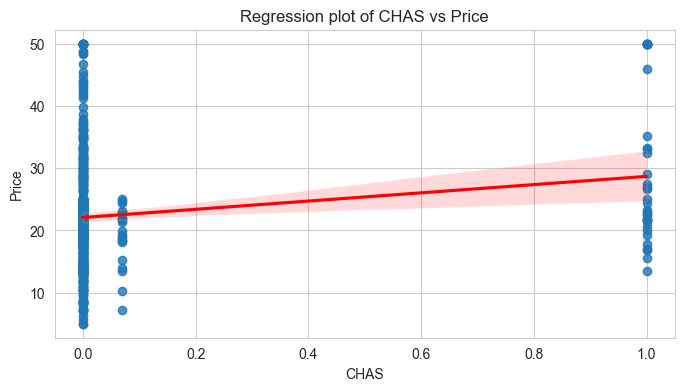

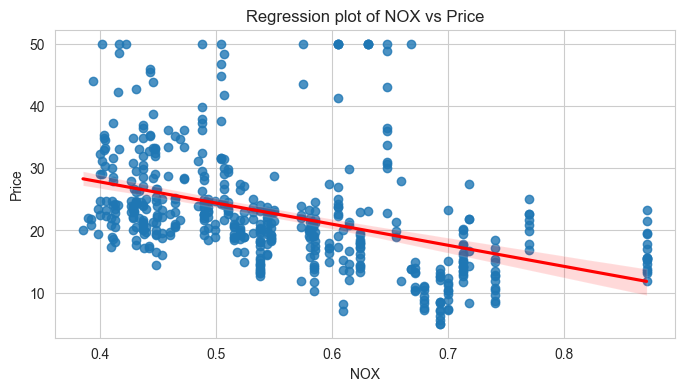

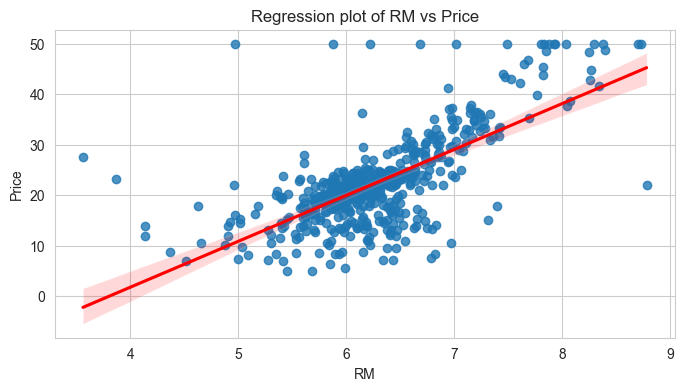

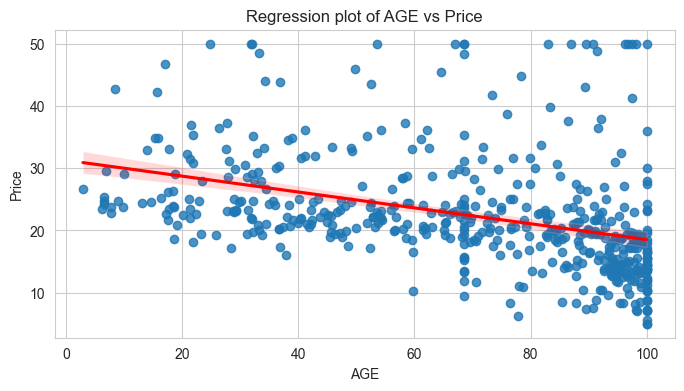

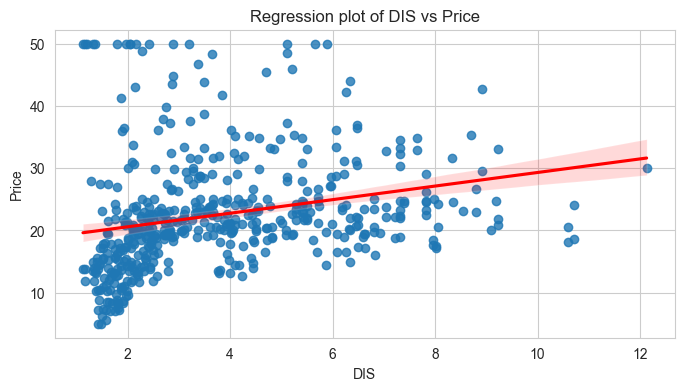

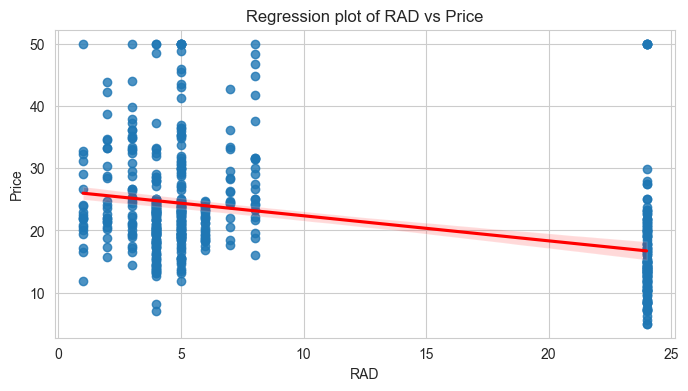

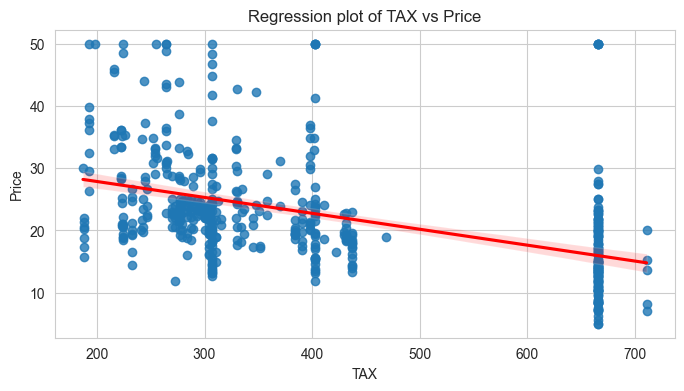

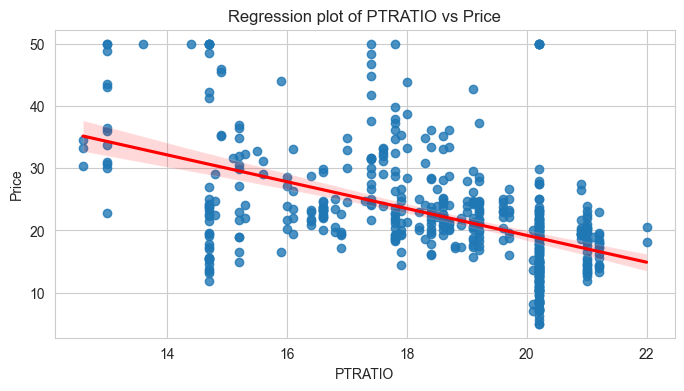

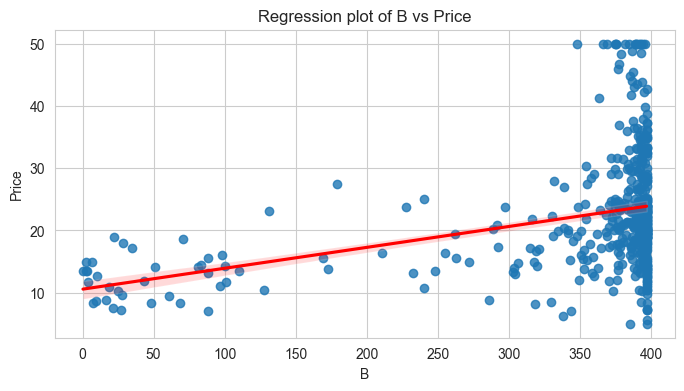

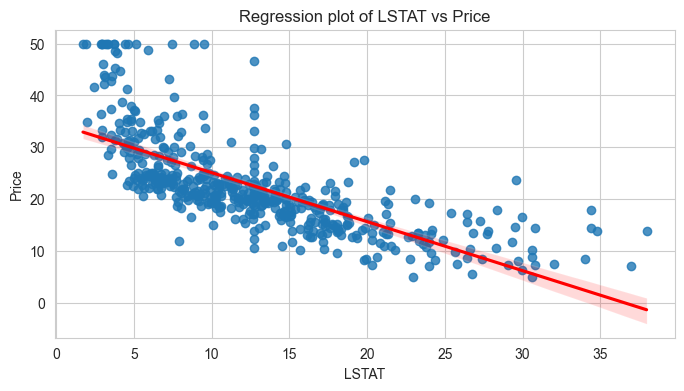

In [15]:
# We will plot regression plots for all columns with the target column 'MEDV' which represents Price
for column in boston_df.columns:
    if column != 'Price':
        plt.figure(figsize=(8, 4))
        sns.regplot(data=boston_df, x=column, y='Price', line_kws={'color': 'red'})
        plt.title(f'Regression plot of {column} vs Price')
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.show()

In [16]:
X = boston_df.drop('Price', axis=1)  # Independent variables
Y = boston_df['Price']  # Dependent variable (Price)

# Display the first few rows of the independent variables
print('Independent variables (first 5 rows):')
print(X.head())

# Display the first few rows of the dependent variable
print('\nDependent variable (Price, first 5 rows):')
print(Y.head())

Independent variables (first 5 rows):
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B      LSTAT  
0  396.90   4.980000  
1  396.90   9.140000  
2  392.83   4.030000  
3  394.63   2.940000  
4  396.90  12.715432  

Dependent variable (Price, first 5 rows):
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64


In [17]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  
0       15.3  396.90   4.9800

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test=train_test_split(X,Y, test_size=0.2,random_state=30)

In [19]:
print(X_train)
print(Y_train)

         CRIM         ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  \
471   4.03841   0.000000  18.10   0.0  0.532  6.229  90.700000  3.0993   24   
436  14.42080   0.000000  18.10   0.0  0.740  6.461  93.300000  2.0026   24   
428   7.36711   0.000000  18.10   0.0  0.679  6.193  78.100000  1.9356   24   
38    0.17505   0.000000   5.96   0.0  0.499  5.966  30.200000  3.8473    5   
157   1.22358  11.211934  19.58   0.0  0.605  6.943  97.400000  1.8773    5   
..        ...        ...    ...   ...    ...    ...        ...     ...  ...   
500   0.22438   0.000000   9.69   0.0  0.585  6.027  79.700000  2.4982    6   
301   0.03537  11.211934   6.09   0.0  0.433  6.590  40.400000  5.4917    7   
429   9.33889   0.000000  18.10   0.0  0.679  6.380  68.518519  1.9682   24   
421   7.02259   0.000000  18.10   0.0  0.718  6.006  95.300000  1.8746   24   
293   0.08265   0.000000  13.92   0.0  0.437  6.127  18.400000  5.5027    4   

     TAX  PTRATIO       B  LSTAT  
471  666     20.

In [20]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [21]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))


C:\Users\Kaptaan Saab\AppData\Local\Temp\ipykernel_1232\2324907949.py:2: ResourceWarning: unclosed file <_io.BufferedWriter name='scaling.pkl'>
  pickle.dump(scaler,open('scaling.pkl','wb'))


In [22]:
X_train

array([[ 0.03337904, -0.49137854,  1.05039806, ...,  0.81111067,
         0.42352359,  0.02943016],
       [ 1.1674556 , -0.49137854,  1.05039806, ...,  0.81111067,
        -3.5196941 ,  0.77086308],
       [ 0.39697554, -0.49137854,  1.05039806, ...,  0.81111067,
        -2.7774464 ,  1.26753726],
       ...,
       [ 0.61235461, -0.49137854,  1.05039806, ...,  0.81111067,
        -3.16347094,  1.6339597 ],
       [ 0.35934335, -0.49137854,  1.05039806, ...,  0.81111067,
        -0.38422286,  0.43449873],
       [-0.39871171, -0.49137854,  0.42718176, ..., -1.10200106,
         0.44035388, -0.5846137 ]])

In [23]:
print(len(X_train))
print(len(X_test))

404
102


In [24]:
#Model Training
from xgboost import XGBRegressor
regression=XGBRegressor()

In [25]:
regression.fit(X_train,Y_train)

c:\Users\Kaptaan Saab\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [26]:
regression.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [27]:
y_pred_train=regression.predict(X_train)
y_pred_train

array([19.684294 ,  9.605038 , 11.001177 , 24.698524 , 41.290066 ,
       14.800236 , 22.204731 , 31.100933 , 23.39455  , 25.000332 ,
       21.418602 , 28.096535 , 15.694338 , 18.93235  , 18.801674 ,
       34.563408 , 16.602522 , 14.899247 , 16.115673 , 24.218887 ,
       16.98062  ,  7.210638 , 14.323569 , 17.500935 , 31.516739 ,
       13.401293 , 15.01056  , 13.814993 , 50.012947 , 16.790125 ,
        8.70216  , 23.682407 , 15.181447 , 19.685242 , 20.303635 ,
        8.092284 , 49.99556  , 13.342354 , 10.221769 , 21.153429 ,
       16.766668 , 29.834696 ,  9.699948 , 13.207533 , 23.311398 ,
       30.30637  , 39.801678 , 24.395693 , 28.552616 , 21.69539  ,
       17.400196 , 19.49363  ,  8.297326 , 27.4739   , 46.70068  ,
       23.103632 , 44.767033 , 12.716216 , 32.929985 , 28.690287 ,
       10.363693 , 50.00256  , 22.389935 , 19.617863 , 23.794266 ,
       22.891281 , 18.373169 , 17.498486 ,  8.524038 , 25.001808 ,
       15.612254 , 38.70487  , 21.188509 , 22.793028 , 21.6060

In [28]:
y_pred_test=regression.predict(X_test)
y_pred_test

array([18.723238, 17.174541, 21.109568, 27.96424 , 14.687671, 18.605167,
       22.558573, 47.572952, 12.77879 , 24.28149 , 24.23261 , 28.443651,
       14.409708, 28.060884, 15.324393, 26.560629, 11.076645, 25.873285,
       16.394325, 22.546179, 19.980352, 12.890674, 27.456415, 17.695337,
        8.98244 , 16.081524, 17.417204, 16.010344, 13.546159, 14.693223,
       13.847051, 20.640564, 33.95536 , 22.75741 , 19.691616, 19.854355,
       13.738027, 21.062098, 13.791813, 19.29789 , 19.656261, 19.9254  ,
       46.25447 , 23.898335, 23.77972 , 18.979618, 21.325573, 18.46343 ,
       18.016659, 16.577318, 15.04094 , 17.527103, 18.539026, 24.310421,
       27.63533 , 23.560001, 50.023655, 26.940159, 19.586128, 34.943005,
       22.209599,  9.357737, 26.593866, 21.49165 ,  9.940238,  9.428262,
       13.95894 , 23.1123  , 43.960484, 35.266384, 14.222492, 30.637186,
       20.958437, 25.452984, 24.946224, 24.520426, 12.560008, 21.049133,
       20.29909 , 32.39613 , 18.820105, 23.13671 , 

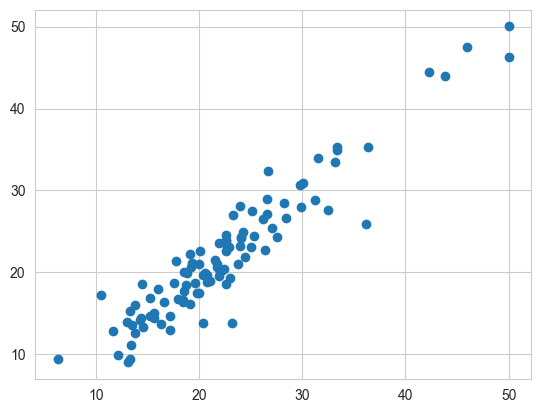

In [29]:
#Plotting a Scatter plot
plt.scatter(Y_test,y_pred_test)

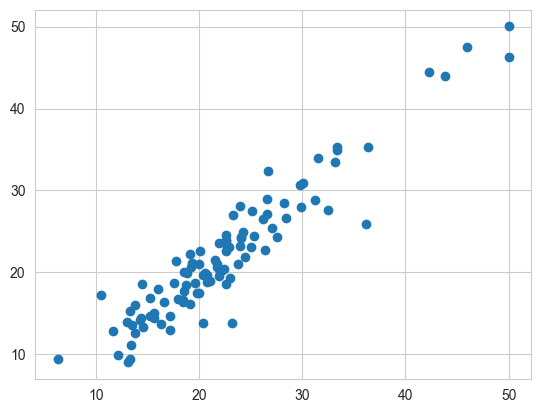

In [30]:
#Plotting a Scatter plot
plt.scatter(Y_test,y_pred_test)

In [31]:
##Finding Error
residual_test= y_pred_test-Y_test
residual_test

21    -0.876762
440    6.674541
103    1.809568
178   -1.935761
22    -0.512329
         ...   
3      1.885278
323    1.551765
41     0.487395
208   -2.503222
442   -2.004126
Name: Price, Length: 102, dtype: float64

c:\Users\Kaptaan Saab\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


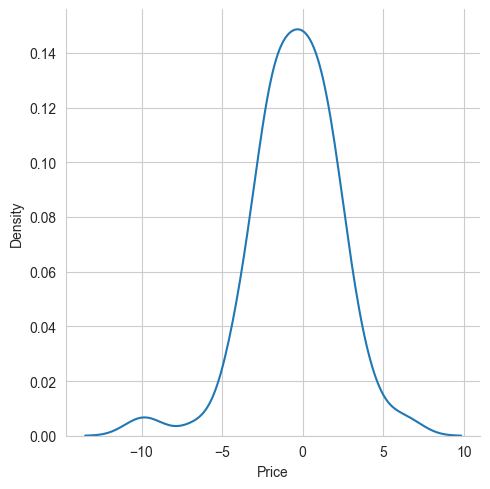

In [32]:
#Ploytting resresidual_tests
sns.displot(residual_test,kind='kde')

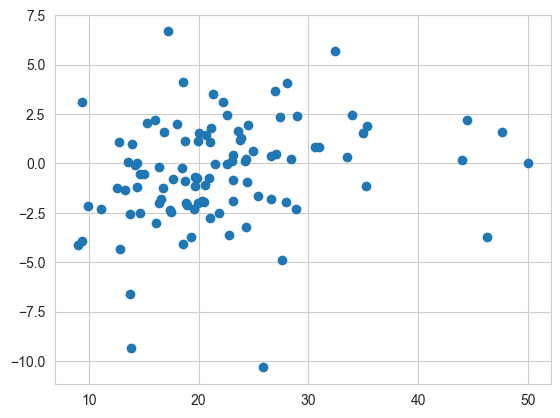

In [33]:
#Scatter plot with respect to predictins
plt.scatter(y_pred_test,residual_test)

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Calculate mean squared error using scikit-learn's function
mse = mean_squared_error(Y_test, y_pred_test)
# Calculate mean absolute error using scikit-learn's function
mae = mean_absolute_error(Y_test, y_pred_test)

# Print the result
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 7.2351543836092675
Mean Absolute Error: 2.017256317886652


In [35]:
#Finding Accuracy
from sklearn.metrics import r2_score
# Calculate R-squared using scikit-learn's function
r_squared = r2_score(Y_test, y_pred_test)

# Print the result
print("R-squared:", r_squared)

R-squared: 0.8862733840750673


In [36]:
import pickle
# Save the trained model to a file using pickle.dump
model_filename = 'regression_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(regression, model_file)

In [37]:
# Load the model from the file
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)